## Section 2, Lecture 8

![a=](dattran.a.jpg)
![b=](dattran.b.jpg)

In [42]:
def r2(Y, Yhat):
    d1 = Y - Yhat
    d2 = Y - Y.mean()
    r2 = 1 - d1.dot(d1) / d2.dot(d2)
    return r2

## Moore Laws

In [2]:
%matplotlib inline
# %matplotlib notebook
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

In [37]:
df = pd.read_csv('moore.csv', delimiter='\t', header=None)
df.set_axis(['name', 'transitor_count', 'year', 'manufacturer', 'tech', 'size'], axis=1, inplace=True)
df.head()

,name,transitor_count,year,manufacturer,tech,size
0,Intel 4004,"2,300",1971,Intel,"10,000 nm",12 mm²
1,Intel 8008,"3,500",1972,Intel,"10,000 nm",14 mm²
2,Intel 8080,"4,500",1974,Intel,"6,000 nm",20 mm²
3,Motorola 6800,"4,100",1974,Motorola,"6,000 nm",16 mm²
4,RCA 1802,"5,000",1974,RCA,"5,000 nm",27 mm²


In [38]:
def clean_df(value):
    value = value.split('[')[0].replace(',', '')
    i = re.search('\d', value).start()
    value = value[i:]
    return int(value)
    
X = df.year.apply(clean_df)
Y = df.transitor_count.apply(clean_df)

In [39]:
Ylog = np.log(Y)
d = X.dot(X) - X.mean()*X.sum()
a = (X.dot(Ylog) - X.mean()*Ylog.sum()) / d
b = (Ylog.mean()*X.dot(X) - X.mean()*X.dot(Ylog)) / d
Yhat = a*X + b

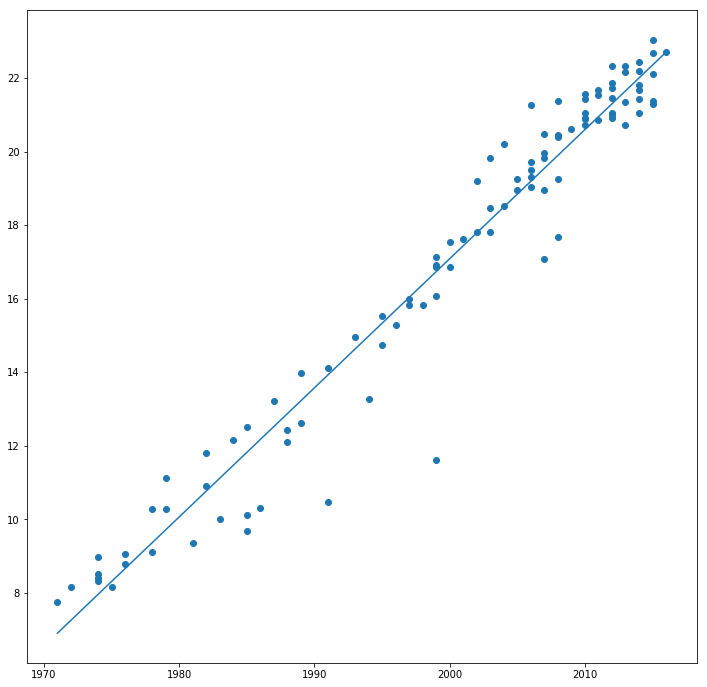

In [40]:
plt.figure(figsize=(12, 12))
plt.scatter(X, Ylog)
plt.plot(X, Yhat)

In [43]:
print(r2(Ylog, Yhat))

0.952944285229


In [13]:
np.log(2) / a

1.9745331723797188

### Section 3, Lecture 16

In [16]:
df = pd.read_csv('data_2d.csv', header=None)
df.head()

,0,1,2
0,17.930201,94.520592,320.259530
1,97.144697,69.593282,404.634472
2,81.775901,5.737648,181.485108
3,55.854342,70.325902,321.773638
4,49.366550,75.114040,322.465486


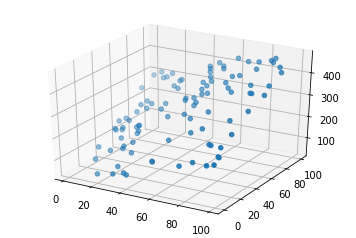

In [20]:
X = df.iloc[:,:2].values
Y = df.iloc[:, 2].values
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)

In [27]:
w = np.linalg.solve(X.T.dot(X), X.T.dot(Y))
Yhat = X.dot(w)
d1 = Y - Yhat
d2 = Y - Y.mean()
r2 = 1 - d1.dot(d1) / d2.dot(d2)
print(r2)

0.997978065087


### Section 3, Lecture 18

In [45]:
df = pd.read_excel('mlr02.xls')
df.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X1,X2,X3
0,132,52,173
1,143,59,184
2,153,67,194
3,162,73,211
4,154,64,196


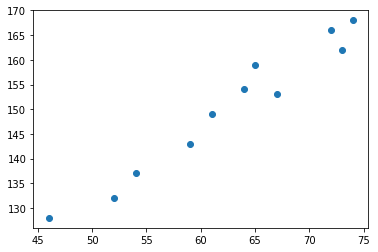

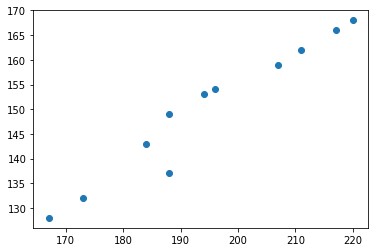

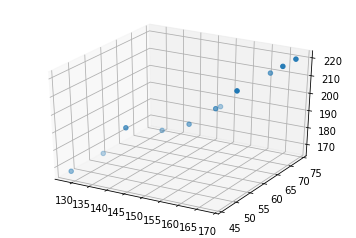

In [46]:
plt.scatter(df.X2, df.X1)
plt.show()

plt.scatter(df.X3, df.X1)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.X1, df.X2, df.X3)

In [51]:
def find_r2(df, featurename, targetname):
    X = df[featurename].values
    Y = df[targetname].values.squeeze()
    w = np.linalg.solve(X.T.dot(X), X.T.dot(Y))
    Yhat = X.dot(w)
    print('featurename: ', featurename, r2(Yhat, Y))

In [52]:
df['ones'] = 1
find_r2(df, ['X2', 'X3', 'ones'], ['X1'])
find_r2(df, ['X2', 'ones'], ['X1'])
find_r2(df, ['X3', 'ones'], ['X1'])

featurename:  ['X2', 'X3', 'ones'] 0.976298342134
featurename:  ['X2', 'ones'] 0.955985083669
featurename:  ['X3', 'ones'] 0.938423475039
